# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
%matplotlib inline

# Data collection

<b><i> Data import </i></b>

In [5]:
tit_data = pd.read_csv("Titanic dataset/train.csv")

In [6]:
tit_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<b><i> Columns description </i></b>

In [7]:
tit_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

| Variable | Definition | Key |
| --- | --- | --- |
| survival | Survival | 0 = No, 1 = Yes |
| pclass | Ticket class	| 1 = 1st, 2 = 2nd, 3 = 3rd |
| sex | Sex |	
| Age |	Age in years |	
| sibsp | # of siblings / spouses aboard the Titanic |
| parch | # of parents / children aboard the Titanic |	
| ticket | Ticket number |	
| fare | Passenger fare	|
| cabin | Cabin number |	
| embarked | Port of Embarkation | C = Cherbourg, Q = Queenstown, S = Southampton |

# Data cleaning

<b><i> Describe the data </i></b>

In [11]:
tit_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


I notice that there is an outlier in the "Fare" feature. I wanna look into it.

In [17]:
tit_data[tit_data['Fare']==max(tit_data['Fare'])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


I assume these 3 people are from the higher class of the ship.

<b><i> Check for null values </i></b>

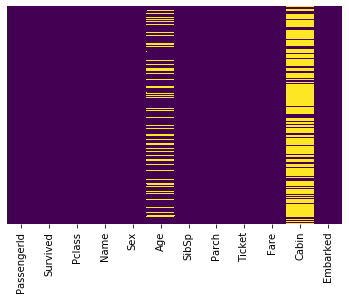

In [18]:
sns.heatmap(tit_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [40]:
print("{0:.0%}".format(tit_data['Age'].isnull().value_counts()[1]/tit_data.shape[0]),"of missing values in the 'Age' feature.") 

20% of missing values in the 'Age' feature.


In [41]:
print("{0:.0%}".format(tit_data['Cabin'].isnull().value_counts()[1]/tit_data.shape[0]),"of missing values in the 'Cabin' feature.")

77% of missing values in the 'Cabin' feature.


We can see that the "Cabin" feature has a lot of missing values, we might consider dropping it.
Regarding the "Age" feature, we might look into other solutions...

In [42]:
tit_data_clean = tit_data.drop('Cabin',axis=1)

In [43]:
tit_data_clean.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [45]:
tit_data_clean['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

I notice that "mean" and "median" are quite close. I assume both could be working solutions for filling missing values. I will choose "mean" to fill NAs.

In [50]:
tit_data_clean['Age'].fillna(tit_data['Age'].mean(),inplace=True)

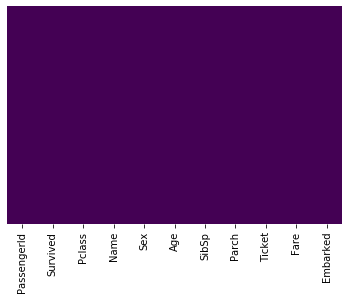

In [52]:
sns.heatmap(tit_data_clean.isnull(),yticklabels=False,cbar=False,cmap='viridis')

That's it! We took care of null values.

# Exploratory Data Analysis (EDA)

We might perform other steps of data cleaning during the EDA.